# Data Wrangling Twitter

## Gathering 

In [12]:
# Import the required library
import requests
import pandas as pd
import json
import pprint
import tweepy
import numpy as np
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [13]:
# Collect the hand file twitter_archive_enhanced.csv file 
df = pd.read_csv('twitter-archive-enhanced.csv')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#Programmatically download and collect Internet files: image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [16]:
#gathering image-predictions.tsv to dataframe
df1 = pd.read_csv('image-predictions.tsv',sep='\t')
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [17]:
# Gathering additional tweets tweet_json.txt we will name it Favorite_retweet_count table.
#We got this file from Udacity instructors.
with open("tweet-json.txt") as data_file:
    #number = next(data_file).strip()
    your_jsons = [json.loads(line) for line in data_file]

In [18]:
#Create DataFrame and fill it with tweet_id, retweet_count and favorite_count
tweet_list=[]
for i in range(len(your_jsons)):
    ID = your_jsons[i]['id']
    retweet_count = your_jsons[i]['retweet_count']
    favorite_count = your_jsons[i]['favorite_count']
    tweet_list.append({'tweet_id':ID,
                       'retweet_count':retweet_count,
                        'favorite_count':favorite_count})


In [19]:
# Create DataFrame from list of dictionaries
df_miss = pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])

In [20]:
df_miss.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess
### Visual assessment

In [21]:
#Checking that variables data types and null rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# check the data content by taking 10 different samples every time 
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,None,None,None,None
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None
1062,741099773336379392,NaN,NaN,2016-06-10 02:48:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ted. He's given up. 11/10 relatable af...,NaN,NaN,NaN,https://vine.co/v/ixHYvdxUx1L,11,10,Ted,None,None,None,None
2126,670338931251150849,NaN,NaN,2015-11-27 20:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,None,None,None,None


In [23]:
#checking the nulls 
df[df.rating_denominator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
#checking duplications.
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
#Check Source variable content.
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
#Checking that variables data types and null rows 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
#checking duplications.
df1[df1.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
# check the data content by taking 10 different samples every time 
df1.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
1109,723912936180330496,https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg,1,Samoyed,0.991772,True,Pomeranian,0.003626,True,chow,0.002232,True
570,678396796259975168,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,Pembroke,0.956180,True,Cardigan,0.031803,True,Chihuahua,0.006276,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044603,True,Italian_greyhound,0.018611,True


In [29]:
#Checking that variables data types and null rows 
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [30]:
# Checking Duplicate Variables Overall DataFrame 
allcolumns = pd.Series(list(df)+list(df1)+list(df_miss))
allcolumns[allcolumns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Quality
##### `Twitter-archive-enhanced `table
- Tweet_id datatype should be a string.
- Timestamp datatype should be data time.
- Rating_denominator has 0 values
- There are unreasonable rate at the column that has the value of  (rating_numerator /  rating_denominator ).
- We only want original tweets no the retweets. 
- Most the folowing column are null, i think we don't need it (in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp).
- Sorce column shoub have clear value instead of HTML tags.
- Sorce column shoud be categorical datatype.
- A lot of null in these columns (doggo, floofer, pupper and puppo).

##### `Image-predictions`table
- Tweet_id datatype should be a string.

##### `Favorite_retweet_count`table
- Tweet_id datatype should be a string.

#### Tidiness
- Favorite_retweet_count table should be part of the Twitter-archive-enhanced table.
- Text column in Twitter-archive-enhanced table should split to Tweet_text and Tweet_link
- Four columns shoud be one with four values(doggo, floofer, pupper and puppo) as dog stages.
- One column "rate" for the value of two columns (rating_numerator / rating_denominator )
- Image-predictions table should be part of the mane table Twitter-archive-enhanced

## Clean up

In [136]:
# back up three data sets
df_clean = df.copy()
df1_clean = df1.copy()
df_miss_clean = df_miss.copy()

### Quality

#### Define
##### `Twitter-archive-enhanced `table
- Change datatype of tweet_id column to a string.
- Change datatype timestamp column to data time.


##### Coding

In [32]:
#Change some datatypes of Twitter-archive-enhanced table
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)


##### Testing

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### Define
##### `Twitter-archive-enhanced `table
- Remove all un-original tweets (retweets).


##### Coding

In [34]:
df_clean = df_clean[(df_clean.retweeted_status_id).isnull()]

##### Testing

In [35]:
df_clean[~(df_clean.retweeted_status_id).isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
##### `Twitter-archive-enhanced `table
- Drop following columns (in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp).


##### Coding

In [36]:
#Drop some columns from Twitter-archive-enhanced table
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                          'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### Testing

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


#### Define
##### `Twitter-archive-enhanced `table
- Remove the HTML Tags and and keep the values.

##### Coding

In [38]:
#Remove the HTML Tags and and keep the values.
df_clean.source = df_clean.source.str.split('"nofollow">',6).str[1].str.split('<',1).str[0]

##### Testing

In [39]:
df_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [40]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
##### `Twitter-archive-enhanced `table
- Change datatype of Sorce column column to categorical.

##### Coding

In [41]:
#Change datatype of Sorce column column to categorical
df_clean.source = df_clean.source.astype('category')

##### Testing

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 206.2+ KB


#### Define
##### `Twitter-archive-enhanced `table
- Drop the row that has rating_denominator is 0 values.

##### Coding

In [43]:
#check the row that has rating_denominator = 0 
df_clean[df_clean.rating_denominator==0]             

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None


In [44]:
#Drop the row that has rating_denominator is 0 values.
df_clean = df_clean.drop(df_clean[df_clean.rating_denominator==0].index,axis=0)

##### Testing

In [45]:
df_clean[df_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
##### `Image-predictions `table

change Tweet_id datatype to string.
##### `Favorite_retweet_count `table

change Tweet_id datatype to string.

##### Coding

In [46]:
#Image-predictions table change Tweet_id datatype to string.

df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
#Favorite_retweet_counttable change Tweet_id datatype to string.

df_miss_clean.tweet_id = df_miss_clean.tweet_id.astype(str)


##### Testing

In [47]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [48]:
df_miss_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness

#### Define
##### `Twitter-archive-enhanced `table

Merge Favorite-and-retweet count table with Twitter-archive-enhanced table.

##### Coding

In [49]:
# Merge Favorite-and-retweet count table with Twitter-archive-enhanced table.
df_clean = pd.merge(df_clean,df_miss_clean,on = 'tweet_id',how = 'inner')

##### Testing

In [50]:
df_clean.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


#### Define
##### `Twitter-archive-enhanced `table
- Creat one column "dog stages" instead of these four columns (doggo, floofer, pupper and puppo) used melt funcation.

##### Coding

In [51]:
# Creat one column "dog_stages" instead of these four columns (doggo, floofer, pupper and puppo).
df_clean['dog_stages']=''
df_clean.dog_stages[(df_clean.doggo != 'None')&(df_clean.floofer == 'None')&(df_clean.pupper == 'None')&(df_clean.puppo == 'None')]='doggo'
df_clean.dog_stages[(df_clean.doggo == 'None')&(df_clean.floofer != 'None')&(df_clean.pupper == 'None')&(df_clean.puppo == 'None')]='floofer'
df_clean.dog_stages[(df_clean.doggo == 'None')&(df_clean.floofer == 'None')&(df_clean.pupper != 'None')&(df_clean.puppo == 'None')]='pupper'
df_clean.dog_stages[(df_clean.doggo == 'None')&(df_clean.floofer == 'None')&(df_clean.pupper == 'None')&(df_clean.puppo != 'None')]='puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

In [52]:
# Drop four columns (doggo, floofer, pupper and puppo).
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

##### Testing

In [53]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,


#### Define
##### `Twitter-archive-enhanced `table
- create one column "rate" for the value of two columns (rating_numerator / rating_denominator )


##### Coding

In [54]:
# create one column "rate" for the value of two columns (rating_numerator / rating_denominator )
df_clean['rate'] = df_clean.rating_numerator/df_clean.rating_denominator

In [55]:
#Drop Two columns 'rating_numerator' and 'rating_denominator'
df_clean = df_clean.drop(['rating_numerator','rating_denominator'],axis=1)

##### Testing

In [56]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_stages,rate
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,,1.2


#### Define
##### `Image-predictions `table

Merge Image-predictions table with Twitter-archive-enhanced table.

In [57]:
#Merge Image-predictions table with Twitter-archive-enhanced table.
df_clean = pd.merge(df_clean,df1_clean[['tweet_id','jpg_url','img_num']],on = 'tweet_id',how = 'inner')

##### Testing

In [58]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_stages,rate,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


### Quality

#### Define
##### `Twitter-archive-enhanced `table
- Delete unreasonable rate rows at the column that has the value of (rating_numerator / rating_denominator ) 'rate'

##### Coding

In [59]:
#Delete unreasonable (outlier) rate rows at the column that has the value of (rating_numerator / rating_denominator ) 'rate' < 1.7

df_clean = df_clean[df_clean.rate <1.7]

##### Testing

In [60]:
df_clean.rate.value_counts()

1.200000    454
1.000000    421
1.100000    402
1.300000    261
0.900000    151
0.800000     95
0.700000     51
1.400000     35
0.500000     34
0.600000     32
0.300000     19
0.400000     15
0.200000     10
0.100000      4
0.000000      2
0.636364      1
0.818182      1
Name: rate, dtype: int64

### Store Cleaing Data


In [61]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_stages,rate,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,3261,20562,,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,2158,12041,,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,16716,56848,,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,4429,28226,,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,7711,32467,doggo,1.4,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1


In [62]:
# Store the DataFrame to CSV files.
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Test The Cleaned Files


In [64]:
# read the cleaned CVS File.
df_cleaned = pd.read_csv('twitter_archive_master.csv')

In [65]:
# Glance of the top 5 rows of Twitter-archive-enhanced-cleaned.csv.
df_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_stages,rate,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

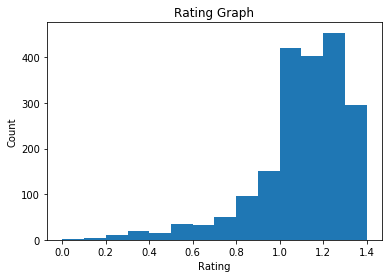

In [67]:
#Rating 
plt.hist(df_clean.rate,bins=14)
plt.title('Rating Graph')
plt.xlabel('Rating')
plt.ylabel('Count');

In [68]:
#Rating Statictical
df_clean.rate.describe()

count    1988.000000
mean        1.054152
std         0.219203
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rate, dtype: float64

<b> - Depend on abve histgram : <br/>
    1 - it is left skewed. <br/>
    2 - 75% of rates are more than 1, the mean if rating is 1.07. <br/>
    3 - The most frequent rating between 1.2 and 1.3 <br/> <b/>

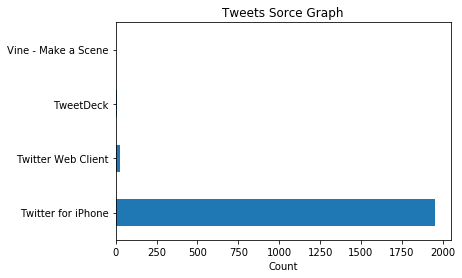

In [69]:
#Tweets Source 
df_clean.source.value_counts().plot(kind='barh')
plt.title('Tweets Sorce Graph')
plt.xlabel('Count');

In [70]:
#Rating Statictical
df_clean.source.value_counts().describe()

count       4.000000
mean      497.000000
std       968.735946
min         0.000000
25%         7.500000
50%        19.000000
75%       508.500000
max      1950.000000
Name: source, dtype: float64

- Depend on abve graph, It clearly shows that tweets from iPhone is the largest quantity in terms of number of tweets 

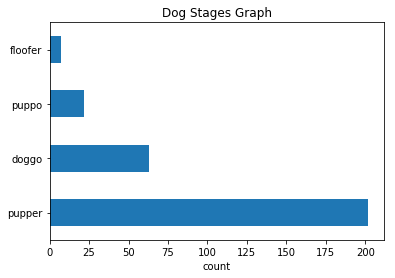

In [71]:
df_clean.dog_stages.value_counts()[1:].plot(kind='barh')
plt.title('Dog Stages Graph')
plt.xlabel('count');

In [72]:
df_clean.dog_stages.value_counts()[1:]

pupper     202
doggo       63
puppo       22
floofer      7
Name: dog_stages, dtype: int64

- Depend on above graph, The most popular Dog stage is pupper and then doggo and then puppo and lastly floofer. 

### The End Thank You,